<a href="https://colab.research.google.com/github/zdiana/pp2-20B030130/blob/main/Assignment_3-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

sentences = [
    "Imagine that you can talk to a computer as naturally as you would with an ordinary person",
    "This is exactly what Natural Language Processing is doing, an area of artificial intelligence that focuses on the interaction between computers and humans using natural language",
    "You ask questions, get answers, give commands - and it's all in your native language"
]

# Токенизация и уникальные слова
words = list(set(" ".join(sentences).replace(",", "").replace("-", "").lower().split()))

# Создание one-hot encoder
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform([[word] for word in words])

# Визуализация в таблице
df = pd.DataFrame(encoded, columns=encoder.categories_[0], index=words)
print(df.head())



            a  all   an  and  answers  area  artificial   as  ask  between  \
ordinary  0.0  0.0  0.0  0.0      0.0   0.0         0.0  0.0  0.0      0.0   
person    0.0  0.0  0.0  0.0      0.0   0.0         0.0  0.0  0.0      0.0   
between   0.0  0.0  0.0  0.0      0.0   0.0         0.0  0.0  0.0      1.0   
using     0.0  0.0  0.0  0.0      0.0   0.0         0.0  0.0  0.0      0.0   
to        0.0  0.0  0.0  0.0      0.0   0.0         0.0  0.0  0.0      0.0   

          ...  that  the  this   to  using  what  with  would  you  your  
ordinary  ...   0.0  0.0   0.0  0.0    0.0   0.0   0.0    0.0  0.0   0.0  
person    ...   0.0  0.0   0.0  0.0    0.0   0.0   0.0    0.0  0.0   0.0  
between   ...   0.0  0.0   0.0  0.0    0.0   0.0   0.0    0.0  0.0   0.0  
using     ...   0.0  0.0   0.0  0.0    1.0   0.0   0.0    0.0  0.0   0.0  
to        ...   0.0  0.0   0.0  1.0    0.0   0.0   0.0    0.0  0.0   0.0  

[5 rows x 47 columns]


        all        an       and   answers      area  artificial        as  \
0  0.000000  0.181954  0.000000  0.000000  0.000000    0.000000  0.478496   
1  0.000000  0.141107  0.141107  0.000000  0.185539    0.185539  0.000000   
2  0.280219  0.000000  0.213114  0.280219  0.000000    0.000000  0.000000   

        ask   between       can  ...      that       the      this        to  \
0  0.000000  0.000000  0.239248  ...  0.181954  0.000000  0.000000  0.239248   
1  0.000000  0.185539  0.000000  ...  0.141107  0.185539  0.185539  0.000000   
2  0.280219  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

      using      what      with     would       you      your  
0  0.000000  0.000000  0.239248  0.239248  0.363909  0.000000  
1  0.185539  0.185539  0.000000  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  0.000000  0.213114  0.280219  

[3 rows x 46 columns]


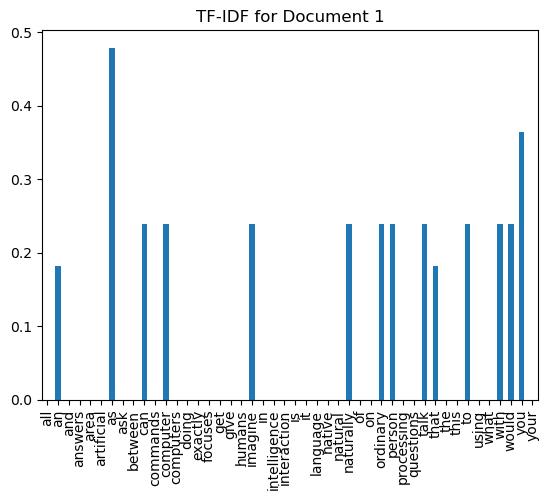

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

docs = [
    "Imagine that you can talk to a computer as naturally as you would with an ordinary person",
    "This is exactly what Natural Language Processing is doing, an area of artificial intelligence that focuses on the interaction between computers and humans using natural language",
    "You ask questions, get answers, give commands - and it's all in your native language"
]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(docs)

# Visualize as table
df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(df)

# Bar chart for one doc
df.iloc[0].plot(kind='bar', title="TF-IDF for Document 1")
plt.show()


In [ ]:
from gensim.models import Word2Vec


sentences = [
    ["although", "natural", "language", "processing", "is", "a", "challenging", "field", "nlp", "offers", "remarkable", "opportunities", "for", "human-like", "interaction"],
    ["machine", "learning", "models", "such", "as", "word2vec", "and", "nlp", "are", "capable", "of", "capturing", "semantic", "similarities", "through", "contextual", "training"],
    ["as", "computers", "continue", "to", "evolve", "rapidly", "the", "importance", "of", "understanding", "nlp", "grows", "significant"],
    ["despite", "the", "complexity", "of", "human", "language", "modern", "nlp", "algorithms", "can", "interpret", "meanings", "with", "surprising", "accuracy"]
]


# CBOW model
cbow_model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, sg=0)

# Skip-gram model
skip_model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, sg=1)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

word = "nlp"
sim_cb = cbow_model.wv.most_similar(word)
sim_sg = skip_model.wv.most_similar(word)

print("CBOW similar:", sim_cb)
print("Skip-gram similar:", sim_sg)


CBOW similar: [('offers', 0.27093377709388733), ('evolve', 0.25460660457611084), ('can', 0.24112579226493835), ('for', 0.21109409630298615), ('processing', 0.18693873286247253), ('understanding', 0.17597536742687225), ('learning', 0.1672004610300064), ('is', 0.16066570580005646), ('interaction', 0.1502501368522644), ('with', 0.1460547000169754)]
Skip-gram similar: [('offers', 0.27164825797080994), ('evolve', 0.25420939922332764), ('can', 0.24168600142002106), ('for', 0.21179015934467316), ('processing', 0.18671168386936188), ('understanding', 0.17694884538650513), ('learning', 0.16759788990020752), ('is', 0.16062316298484802), ('interaction', 0.15090560913085938), ('with', 0.14678043127059937)]


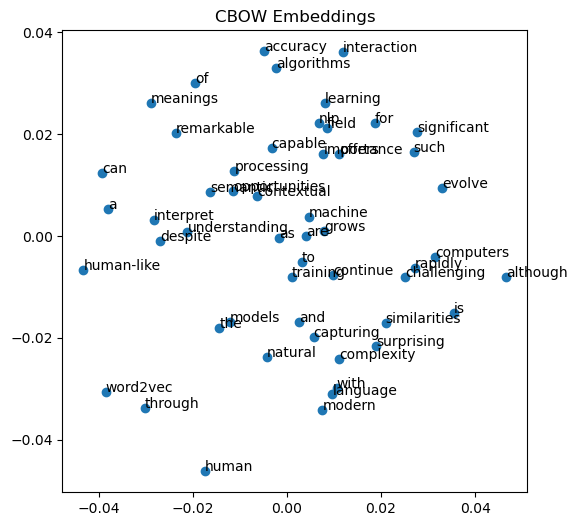

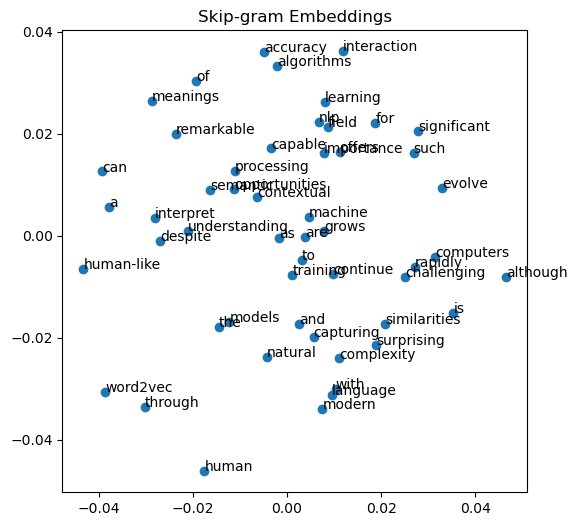

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_embeddings(model, title):
    words = list(model.wv.key_to_index)
    X = model.wv[words]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    plt.figure(figsize=(6,6))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title(title)
    plt.show()

plot_embeddings(cbow_model, "CBOW Embeddings")
plot_embeddings(skip_model, "Skip-gram Embeddings")


In [ ]:
# загрузка glove.6B.100d.txt
import numpy as np

def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove = load_glove_embeddings("glove.6B.100d.txt")
def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1)*np.linalg.norm(v2))

word = "king"
sims = {w: cosine_sim(glove[word], vec) for w, vec in glove.items() if w != word}
similar = sorted(sims.items(), key=lambda x: x[1], reverse=True)[:5]
print(similar)


[('prince', 0.76823294), ('queen', 0.7507691), ('son', 0.7020889), ('brother', 0.6985775), ('monarch', 0.697789)]


In [ ]:
from gensim.models import FastText

sentences = [
    ["although", "natural", "language", "processing", "is", "a", "challenging", "field", "nlp", "offers", "remarkable", "opportunities", "for", "human-like", "interaction"],
    ["machine", "learning", "models", "such", "as", "word2vec", "and", "nlp", "are", "capable", "of", "capturing", "semantic", "similarities", "through", "contextual", "training"],
    ["as", "computers", "continue", "to", "evolve", "rapidly", "the", "importance", "of", "understanding", "nlp", "grows", "significant"],
    ["despite", "the", "complexity", "of", "human", "language", "modern", "nlp", "algorithms", "can", "interpret", "meanings", "with", "surprising", "accuracy"]
]
fasttext_model = FastText(sentences, vector_size=50, window=3, min_count=1)

fasttext_model.wv.most_similar("nlp")


[('algorithms', 0.292682409286499),
 ('for', 0.27724921703338623),
 ('offers', 0.26565760374069214),
 ('importance', 0.24373747408390045),
 ('despite', 0.23331736028194427),
 ('is', 0.16685828566551208),
 ('contextual', 0.15764781832695007),
 ('can', 0.15527315437793732),
 ('semantic', 0.1534586250782013),
 ('complexity', 0.12353377789258957)]

In [ ]:
import torch
from collections import defaultdict

# 1. Данные: длинные предложения и метки
texts = [
    "I absolutely loved the performance of the lead actor in the historical drama",
    "The plot was incredibly boring and predictable from the very beginning",
    "An outstanding cinematic experience with brilliant visual effects",
    "The storyline lacked depth and the characters were poorly developed",
    "A fascinating and thought-provoking film that exceeded expectations",
    "It was a complete waste of time with no redeeming qualities whatsoever"
]

labels = [1, 0, 1, 0, 1, 0]

# 2. Токенизация
tokenized_texts = [text.lower().split() for text in texts]

# 3. Создание словаря
vocab = {'<PAD>': 0}
idx = 1
for sentence in tokenized_texts:
    for word in sentence:
        if word not in vocab:
            vocab[word] = idx
            idx += 1

# 4. Преобразование слов в индексы + паддинг
max_len = max(len(sentence) for sentence in tokenized_texts)
indexed_sentences = []
for sentence in tokenized_texts:
    indices = [vocab[word] for word in sentence]
    indices += [vocab['<PAD>']] * (max_len - len(indices))
    indexed_sentences.append(indices)

# 5. Преобразование в тензоры
X = torch.tensor(indexed_sentences)
y = torch.tensor(labels).float().unsqueeze(1)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: torch.Size([6, 13])
y shape: torch.Size([6, 1])


In [ ]:
class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, hidden_size):
        super(SimpleRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, hidden_size)
        self.rnn = nn.RNN(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.rnn(x)
        return torch.sigmoid(self.fc(out[:, -1, :]))


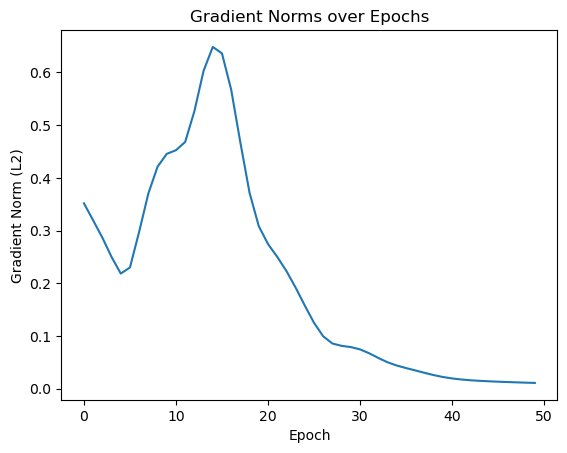

In [ ]:
model = SimpleRNN(vocab_size=len(vocab), hidden_size=8)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

gradient_norms = []

for epoch in range(50):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()

    # Сохраняем L2-норму градиента первого слоя
    total_norm = 0
    for p in model.rnn.parameters():
        if p.grad is not None:
            total_norm += p.grad.norm().item()
    gradient_norms.append(total_norm)

    optimizer.step()

# Визуализация исчезающего градиента
plt.plot(gradient_norms)
plt.title("Gradient Norms over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm (L2)")
plt.show()


In [ ]:
class SentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(SentimentRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        embedded = self.embedding(x)
        output, hidden = self.rnn(embedded)
        return torch.sigmoid(self.fc(output[:, -1, :]))


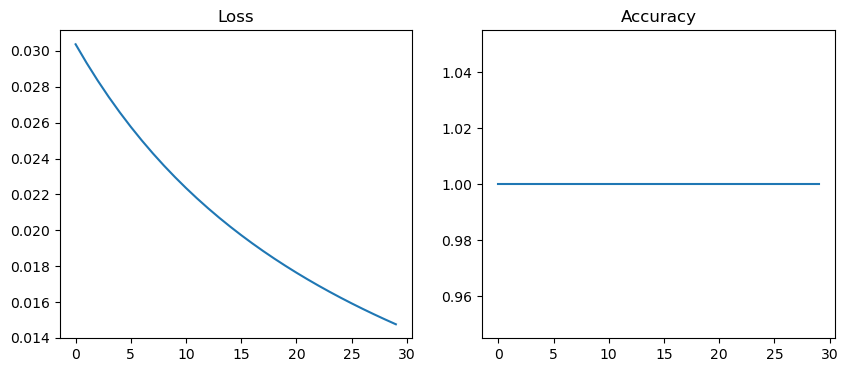

In [ ]:
losses = []
accuracies = []

for epoch in range(30):
    optimizer.zero_grad()
    preds = model(X)
    loss = criterion(preds, y)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        acc = ((preds > 0.5).float() == y).float().mean().item()
    losses.append(loss.item())
    accuracies.append(acc)

# Визуализация
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(losses); plt.title("Loss")
plt.subplot(1, 2, 2)
plt.plot(accuracies); plt.title("Accuracy")
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import os

In [ ]:
with open('dataset.txt', 'r', encoding='utf-8') as f:
    full_text = f.read().strip()

# For language modeling we need sequences
seq_length = 20

# Tokenize the text into integers.
tokenizer_rnn = Tokenizer()
tokenizer_rnn.fit_on_texts([full_text])
sequences = tokenizer_rnn.texts_to_sequences([full_text])[0]
vocab_size_rnn = len(tokenizer_rnn.word_index) + 1

In [ ]:
# Create sequences: use (seq_length) words to predict the next word.
X_rnn, y_rnn = [], []
for i in range(seq_length, len(sequences)):
    X_rnn.append(sequences[i - seq_length:i])
    y_rnn.append(sequences[i])
X_rnn = np.array(X_rnn)
y_rnn = tf.keras.utils.to_categorical(y_rnn, num_classes=vocab_size_rnn)

In [ ]:
# --- Define a custom RNN model that logs gradients ---
class CustomRNN(Model):
    def __init__(self, vocab_size, seq_length):
        super(CustomRNN, self).__init__()
        self.embedding = Embedding(vocab_size, 100, input_length=seq_length)
        self.rnn = SimpleRNN(128)
        self.dense = Dense(vocab_size, activation='softmax')
        # To store gradient norms per batch in each epoch
        self.gradients_per_epoch = []

    def call(self, inputs, training=False):
        x = self.embedding(inputs)
        x = self.rnn(x)
        return self.dense(x)

    # Override the train_step to log gradients.
    def train_step(self, data):
        x, y = data
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)
        gradients = tape.gradient(loss, self.trainable_variables)
        # Compute norm for each gradient and average them (ignore any Nones)
        grad_norms = [tf.norm(g) for g in gradients if g is not None]
        avg_grad_norm = tf.reduce_mean(grad_norms)
        # Apply gradients
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        # Update metrics (includes the metric that tracks loss and accuracy)
        self.compiled_metrics.update_state(y, y_pred)
        # Log the average gradient norm in the returned dictionary.
        return {"loss": loss, "avg_grad_norm": avg_grad_norm}


In [ ]:
custom_rnn = CustomRNN(vocab_size_rnn, seq_length)
custom_rnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Elshibek\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Create a callback to record average gradient norm per epoch.
class GradientLogger(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_grad_norms = []
    def on_train_batch_end(self, batch, logs=None):
        # Append the average gradient norm from this batch.
        self.epoch_grad_norms.append(logs.get("avg_grad_norm"))
    def on_epoch_end(self, epoch, logs=None):
        # Compute and store the average gradient norm for the epoch.
        avg_epoch_grad = np.mean(self.epoch_grad_norms)
        print(f"Epoch {epoch + 1}: average gradient norm = {avg_epoch_grad:.4f}")
        # Save into a list in the model for later plotting.
        if not hasattr(self.model, 'gradients_history'):
            self.model.gradients_history = []
        self.model.gradients_history.append(avg_epoch_grad)

In [ ]:
# Train the custom RNN model with gradient logging.
grad_logger = GradientLogger()
history_rnn = custom_rnn.fit(X_rnn, y_rnn, epochs=10, batch_size=64, callbacks=[grad_logger])


Epoch 1/10


C:\Users\Elshibek\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:615: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(
C:\Users\Elshibek\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:590: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - avg_grad_norm: 0.3420 - loss: 5.8305Epoch 1: average gradient norm = 0.3420
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - avg_grad_norm: 0.3462 - loss: 5.8212
Epoch 2/10
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - avg_grad_norm: 0.3091 - loss: 5.3806Epoch 2: average gradient norm = 0.3137
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - avg_grad_norm: 0.3188 - loss: 5.3282
Epoch 3/10
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - avg_grad_norm: 0.3045 - loss: 5.1984Epoch 3: average gradient norm = 0.3112
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - avg_grad_norm: 0.3179 - loss: 5.2116
Epoch 4/10
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - avg_grad_norm: 0.3146 - loss: 5.1329Epoch 4: average gradient norm = 0.3243
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - avg_grad_norm: 0.3317 - loss: 5.1793
Epoch 5/10
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - avg_grad_norm: 0.2962 - loss: 5.1132Epoch 5: average gradient norm = 0.3068
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - avg_grad

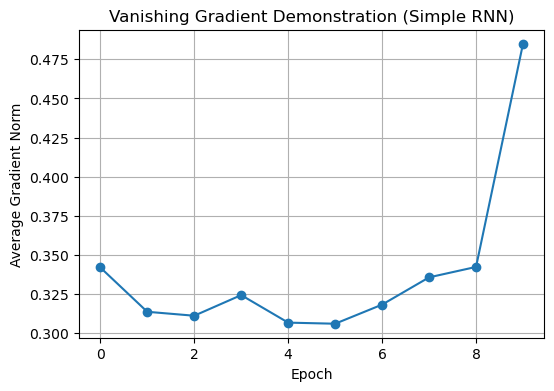

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(custom_rnn.gradients_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Average Gradient Norm')
plt.title('Vanishing Gradient Demonstration (Simple RNN)')
plt.grid(True)
plt.show()

In [ ]:
# For classification, we will segment the text into fixed-length blocks and assign synthetic labels.
words = full_text.split()
segment_length = 20  # number of words per segment
segments = []
labels = []
# For demonstration, assign label 1 ("positive") for the first half and 0 ("negative") for the second half.
num_segments = len(words) // segment_length
for i in range(num_segments):
    segment = ' '.join(words[i * segment_length : (i + 1) * segment_length])
    segments.append(segment)
    if i < num_segments // 2:
        labels.append(1)
    else:
        labels.append(0)

# Tokenize the segments.
tokenizer_cls = Tokenizer()
tokenizer_cls.fit_on_texts(segments)
X_cls_seq = tokenizer_cls.texts_to_sequences(segments)
X_cls_seq = pad_sequences(X_cls_seq, maxlen=segment_length)
y_cls = np.array(labels)


C:\Users\Elshibek\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 523ms/step - accuracy: 0.4989 - loss: 0.7017 - val_accuracy: 0.4000 - val_loss: 0.7159
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9048 - loss: 0.5273 - val_accuracy: 0.2000 - val_loss: 0.7803
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.3957 - val_accuracy: 0.1000 - val_loss: 0.8578
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.2508 - val_accuracy: 0.1000 - val_loss: 0.9232
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.1242 - val_accuracy: 0.2000 - val_loss: 0.9691
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.0539 - val_accuracy: 0.3000 - val_loss: 0.9867
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.0264 - val_accuracy: 0.5000 - val_loss: 1.0023
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.0162 - val_accuracy: 0.4000 - val_loss: 1.0176

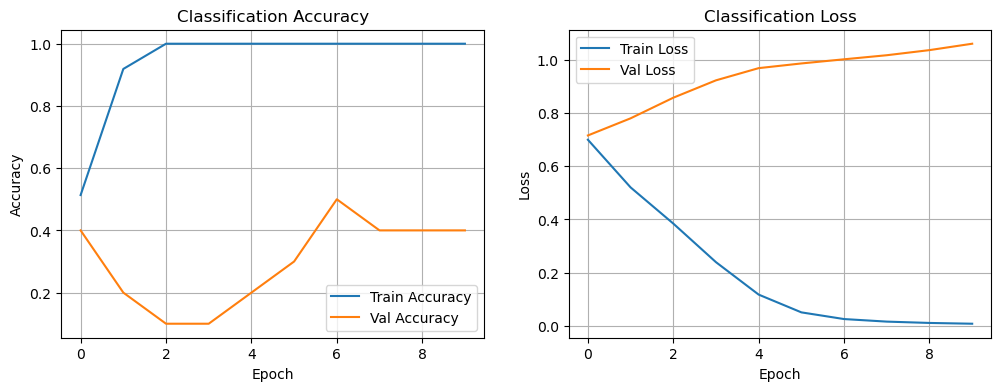

In [ ]:
# Build a simple RNN classifier.
def build_classifier(vocab_size, input_length):
    model = Sequential([
        Embedding(vocab_size, 100, input_length=input_length),
        SimpleRNN(64),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

vocab_size_cls = len(tokenizer_cls.word_index) + 1
classifier = build_classifier(vocab_size_cls, segment_length)
classifier.summary()

# Train the classifier and keep the history.
history_cls = classifier.fit(X_cls_seq, y_cls, epochs=10, batch_size=16, validation_split=0.2)

# Plot training accuracy and loss curves.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# Accuracy plot
ax1.plot(history_cls.history['accuracy'], label='Train Accuracy')
ax1.plot(history_cls.history['val_accuracy'], label='Val Accuracy')
ax1.set_title('Classification Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)
# Loss plot
ax2.plot(history_cls.history['loss'], label='Train Loss')
ax2.plot(history_cls.history['val_loss'], label='Val Loss')
ax2.set_title('Classification Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)
plt.show()


In [ ]:
seq_length_lstm = 20

# Tokenize text for LSTM/GRU tasks.
tokenizer_lstm = Tokenizer()
tokenizer_lstm.fit_on_texts([full_text])
sequences_lstm = tokenizer_lstm.texts_to_sequences([full_text])[0]
vocab_size_lstm = len(tokenizer_lstm.word_index) + 1

# Prepare input-output pairs: use seq_length_lstm words as input and the next word as output.
X_lstm, y_lstm = [], []
for i in range(seq_length_lstm, len(sequences_lstm)):
    X_lstm.append(sequences_lstm[i - seq_length_lstm : i])
    y_lstm.append(sequences_lstm[i])
X_lstm = np.array(X_lstm)
y_lstm = tf.keras.utils.to_categorical(y_lstm, num_classes=vocab_size_lstm)


In [ ]:
def create_lstm_model():
    model = Sequential([
        Embedding(vocab_size_lstm, 100, input_length=seq_length_lstm),
        LSTM(128),
        Dense(vocab_size_lstm, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

def create_gru_model():
    model = Sequential([
        Embedding(vocab_size_lstm, 100, input_length=seq_length_lstm),
        GRU(128),
        Dense(vocab_size_lstm, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

In [ ]:
lstm_model = create_lstm_model()
start_time = time.time()
history_lstm = lstm_model.fit(X_lstm, y_lstm, epochs=5, batch_size=64, verbose=1)
lstm_time = time.time() - start_time
lstm_loss, lstm_acc = lstm_model.evaluate(X_lstm, y_lstm, verbose=0)

Epoch 1/5


C:\Users\Elshibek\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.0352 - loss: 5.9343
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.0883 - loss: 5.6630
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.0663 - loss: 5.2259
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.0635 - loss: 5.2111
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.0705 - loss: 5.1899


In [ ]:
gru_model = create_gru_model()
start_time = time.time()
history_gru = gru_model.fit(X_lstm, y_lstm, epochs=5, batch_size=64, verbose=1)
gru_time = time.time() - start_time
gru_loss, gru_acc = gru_model.evaluate(X_lstm, y_lstm, verbose=0)

print(f"LSTM Model: Training Time = {lstm_time:.2f} sec, Accuracy = {lstm_acc:.4f}")
print(f"GRU Model: Training Time = {gru_time:.2f} sec, Accuracy = {gru_acc:.4f}")


Epoch 1/5


C:\Users\Elshibek\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.0379 - loss: 5.9332
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.0777 - loss: 5.7624
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.0590 - loss: 5.2178
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.0822 - loss: 5.1040
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.0701 - loss: 5.1808
LSTM Model: Training Time = 12.85 sec, Accuracy = 0.0734
GRU Model: Training Time = 11.98 sec, Accuracy = 0.0734


In [ ]:
# Build an LSTM text generation model.
model_lstm_gen = Sequential([
    Embedding(vocab_size_lstm, 50, input_length=seq_length_lstm),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dense(vocab_size_lstm, activation='softmax')
])
model_lstm_gen.compile(loss='sparse_categorical_crossentropy', optimizer='adam')


C:\Users\Elshibek\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# For text generation, we need to adjust output labels (not one-hot encoded).
y_lstm_gen = []
for i in range(seq_length_lstm, len(sequences_lstm)):
    y_lstm_gen.append(sequences_lstm[i])
y_lstm_gen = np.array(y_lstm_gen)

# Train the generation model
model_lstm_gen.fit(X_lstm, y_lstm_gen, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - loss: 5.9098
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 5.2842
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 5.1071
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 5.2072
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 5.0466


In [ ]:
# Function to generate text given a seed text.
def generate_text(model, tokenizer, seq_length, seed_text, num_words=50):
    output_text = seed_text
    for _ in range(num_words):
        sequence = tokenizer.texts_to_sequences([output_text])[0]
        sequence = pad_sequences([sequence], maxlen=seq_length, padding='pre')
        predicted_prob = model.predict(sequence, verbose=0)
        predicted_index = np.argmax(predicted_prob)
        # Map the index back to word. If index not found, use an empty string.
        predicted_word = tokenizer.index_word.get(predicted_index, '')
        output_text += ' ' + predicted_word
    return output_text


In [ ]:
# Generate text from the trained LSTM generation model.
seed = "once upon a time"
generated = generate_text(model_lstm_gen, tokenizer_lstm, seq_length_lstm, seed, num_words=50)
print("\n--- Generated Text ---")
print(generated)


--- Generated Text ---
once upon a time the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the


In [ ]:
def create_bidirectional_lstm_model():
    model = Sequential([
        Embedding(vocab_size_lstm, 100, input_length=seq_length_lstm),
        Bidirectional(LSTM(128)),
        Dense(vocab_size_lstm, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

In [ ]:
# Train the Bidirectional LSTM model.
bi_lstm_model = create_bidirectional_lstm_model()
start_time = time.time()
history_bi = bi_lstm_model.fit(X_lstm, y_lstm, epochs=5, batch_size=64, verbose=1)
bi_time = time.time() - start_time
bi_loss, bi_acc = bi_lstm_model.evaluate(X_lstm, y_lstm, verbose=0)

print(f"Bidirectional LSTM Model: Training Time = {bi_time:.2f} sec, Accuracy = {bi_acc:.4f}")


Epoch 1/5


C:\Users\Elshibek\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.0373 - loss: 5.9292
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0829 - loss: 5.4439
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0412 - loss: 5.1818
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.0818 - loss: 5.1869
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0812 - loss: 5.1236
Bidirectional LSTM Model: Training Time = 17.12 sec, Accuracy = 0.0734


In [ ]:
# Compare results: print results for the standard LSTM and Bidirectional LSTM.
print("\n--- Comparison of LSTM and Bidirectional LSTM ---")
print(f"Standard LSTM: Accuracy = {lstm_acc:.4f}")
print(f"Bidirectional LSTM: Accuracy = {bi_acc:.4f}")


--- Comparison of LSTM and Bidirectional LSTM ---
Standard LSTM: Accuracy = 0.0734
Bidirectional LSTM: Accuracy = 0.0734
